In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from taigapy import TaigaClient
tc = TaigaClient()
public_19Q4_proteincoding_tpm = tc.get(name='depmap-rnaseq-expression-data-ccd0', version=16, file='public_19Q4_proteincoding_tpm')



import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statannot import add_stat_annotation

anot = pd.read_csv('aneuploidy_data_NEW_COMPACT.csv',index_col=0)

anot_CCLE = anot.copy()
anot_CCLE.index = anot_CCLE.loc[:,'CCLE_ID']

from cds import plotting

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
my_order = order=['Diploid','Aneuploid']

from taigapy import TaigaClient
tc = TaigaClient()

gene_effect_rnai_achilles = tc.get(name='demeter2-achilles-5386', version=13, file='gene_effect')
gene_effect_rnai_drive = tc.get(name='demeter2-drive-0591', version=12, file='gene_effect')
gene_effect_crispr_achilles = tc.get(name='avana-public-tentative-19q4-c2df', version=4, file='gene_effect')

# ess = tc.get(name='avana-public-tentative-19q4-c2df', version=4, file='essential_genes').values[:,0]
# com_ess = tc.get(name='avana-public-tentative-19q4-c2df', version=4, file='pan_dependent_genes').values[:,0]

In [26]:
print(anot[anot.loc[:,'many_arm_events'] == False].loc[:,'num_arm_events'].max())
print(anot[anot.loc[:,'many_arm_events'] == False].loc[:,'num_arm_events'].min())
print(anot[anot.loc[:,'many_arm_events'] == False].loc[:,'num_arm_events'].median())

7
0
3.0


In [27]:
print(anot[anot.loc[:,'many_arm_events'] == True].loc[:,'num_arm_events'].max())
print(anot[anot.loc[:,'many_arm_events'] == True].loc[:,'num_arm_events'].min())
print(anot[anot.loc[:,'many_arm_events'] == True].loc[:,'num_arm_events'].median())

36
22
25.0


In [25]:
anot.loc[:,'num_arm_events'].max()

36

In [2]:
protos = pd.read_table('geneset (1).txt',header=1).values[:,0]

In [3]:
new_prots = []
for g in protos:
    if 'PSMC' in g or 'PSMD' in g:
        new_prots.append(g)

In [4]:
new_prots

['PSMC1',
 'PSMC1P4',
 'PSMC2',
 'PSMC3',
 'PSMC4',
 'PSMC5',
 'PSMC6',
 'PSMD1',
 'PSMD11',
 'PSMD12',
 'PSMD13',
 'PSMD14',
 'PSMD2',
 'PSMD3',
 'PSMD4',
 'PSMD6',
 'PSMD7',
 'PSMD8']

In [5]:
gene_effect_rnai_achilles.columns = gene_effect_rnai_achilles.columns.str.split(' ').str[0]
gene_effect_rnai_drive.columns = gene_effect_rnai_drive.columns.str.split(' ').str[0]
gene_effect_crispr_achilles.columns = gene_effect_crispr_achilles.columns.str.split(' ').str[0]

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


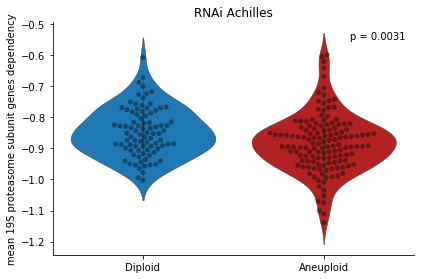

In [7]:
from scipy import stats 


shared = set(anot_CCLE.index) & set(gene_effect_rnai_achilles.index)
temp = gene_effect_rnai_achilles.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'


temp['mean'] = temp.loc[:,(set(new_prots) & set(temp.columns))].mean(axis=1)


fig,ax = plt.subplots()
sns.violinplot(y = 'mean',x='ploidy', data = temp,saturation=1,linewidth=.5,order=my_order,palette = my_pal)
sns.swarmplot(y = 'mean',x='ploidy', data = temp,color='black',alpha=.4,order=my_order)


plt.xlabel('')
plt.ylabel('mean 19S proteasome subunit genes dependency')
plotting.simpleaxis()



tt,p_val = stats.ttest_ind(temp.loc[trus,'mean'].dropna(),temp.loc[falsee,'mean'].dropna())
ax.legend(title='p = '+ str(round(p_val,4)),frameon=False)
plt.title('RNAi Achilles')

plt.tight_layout()

plt.savefig('review_plots/19s_rnai_achilles_NEW.png')

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


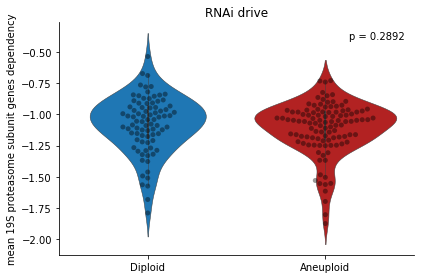

In [9]:
from scipy import stats 


shared = set(anot_CCLE.index) & set(gene_effect_rnai_drive.index)
temp = gene_effect_rnai_drive.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'


temp['mean'] = temp.loc[:,(set(new_prots) & set(temp.columns))].mean(axis=1)


fig,ax = plt.subplots()
sns.violinplot(y = 'mean',x='ploidy', data = temp,saturation=1,linewidth=.5,order=my_order,palette = my_pal)
sns.swarmplot(y = 'mean',x='ploidy', data = temp,color='black',alpha=.4,order=my_order)


plt.xlabel('')
plt.ylabel('mean 19S proteasome subunit genes dependency')
plotting.simpleaxis()



tt,p_val = stats.ttest_ind(temp.loc[trus,'mean'].dropna(),temp.loc[falsee,'mean'].dropna())
ax.legend(title='p = '+ str(round(p_val,4)),frameon=False)
plt.title('RNAi drive')

plt.tight_layout()

plt.savefig('review_plots/19s_rnai_drive_NEW.png')

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


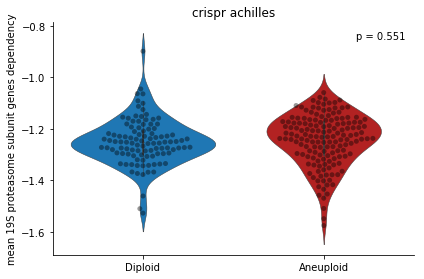

In [11]:
from scipy import stats 


shared = set(anot.index) & set(gene_effect_crispr_achilles.index)
temp = gene_effect_crispr_achilles.loc[shared]
temp['ploidy'] = anot.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'


temp['mean'] = temp.loc[:,(set(new_prots) & set(temp.columns))].mean(axis=1)


fig,ax = plt.subplots()
sns.violinplot(y = 'mean',x='ploidy', data = temp,saturation=1,linewidth=.5,order=my_order,palette = my_pal)
sns.swarmplot(y = 'mean',x='ploidy', data = temp,color='black',alpha=.4,order=my_order)


plt.xlabel('')
plt.ylabel('mean 19S proteasome subunit genes dependency')
plotting.simpleaxis()



tt,p_val = stats.ttest_ind(temp.loc[trus,'mean'].dropna(),temp.loc[falsee,'mean'].dropna())
ax.legend(title='p = '+ str(round(p_val,4)),frameon=False)
plt.title('crispr achilles')

plt.tight_layout()

plt.savefig('review_plots/19s_crispr_achilles_NEW.png')

In [12]:
public_19Q4_proteincoding_tpm = tc.get(name='depmap-rnaseq-expression-data-ccd0', version=16, file='public_19Q4_proteincoding_tpm')



In [13]:
sample_info = tc.get(name='internal-19q4-fb11', version=29, file='sample_info')

sample_info.index = sample_info.loc[:,'CCLE_Name'] 

sample_info = sample_info[~sample_info.index.duplicated(keep='first')]

sample_info_ = sample_info.copy()
sample_info_.index = sample_info_.loc[:,'DepMap_ID']

In [14]:
public_19Q4_proteincoding_tpm.columns = public_19Q4_proteincoding_tpm.columns.str.split(' ').str[0]

In [15]:
public_19Q4_proteincoding_tpm.index = sample_info_.loc[public_19Q4_proteincoding_tpm.index,'CCLE_Name']

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


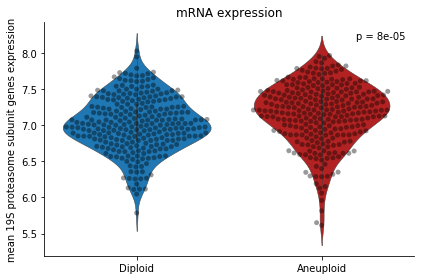

In [17]:
from scipy import stats 


shared = set(anot_CCLE.index) & set(public_19Q4_proteincoding_tpm.index)
temp = public_19Q4_proteincoding_tpm.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'


temp['mean'] = temp.loc[:,(set(new_prots) & set(temp.columns))].mean(axis=1)


fig,ax = plt.subplots()
sns.violinplot(y = 'mean',x='ploidy', data = temp,saturation=1,linewidth=.5,order=my_order,palette = my_pal)
sns.swarmplot(y = 'mean',x='ploidy', data = temp,color='black',alpha=.4,order=my_order)


plt.xlabel('')
plt.ylabel('mean 19S proteasome subunit genes expression')
plotting.simpleaxis()



tt,p_val = stats.ttest_ind(temp.loc[trus,'mean'].dropna(),temp.loc[falsee,'mean'].dropna())
ax.legend(title='p = '+ str(round(p_val,5)),frameon=False)
plt.title('mRNA expression')

plt.tight_layout()

plt.savefig('review_plots/19s_expression_NEW.png')